In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import nbinom, poisson
from scipy.optimize import minimize
from scipy.special import gamma, factorial
import warnings
warnings.filterwarnings('ignore')

# Part I: Replicating Models from Class

## Question 1: The Poisson Model

In [ ]:
billboard = pd.read_csv('billboard.csv')

In [ ]:
billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   EXPOSURES  24 non-null     int64
 1   PEOPLE     24 non-null     int64
dtypes: int64(2)
memory usage: 512.0 bytes


In [ ]:
billboard.head()

,EXPOSURES,PEOPLE
0,0,48
1,1,37
2,2,30
3,3,24
4,4,20


In [ ]:
# Defining a log-likelihood function for the Poisson Distribution
def poisson_log_likelihood(lmda, data):
    exposures = data['EXPOSURES']
    people = data['PEOPLE']
    # use log-probability mass function for Poisson
    return -np.sum(poisson.logpmf(exposures, lmda) * people)

In [ ]:
# Estimating lambda using MLE
initial_lmda = billboard['EXPOSURES'].mean()
result_1 = minimize(poisson_log_likelihood, initial_lmda, args=(billboard))
lmda_1 = result_1.x
max_ll_1 = -result_1.fun

# Displaying results
print('Estimated lambda:', lmda_1)
print('Maximum log-likelihood:', max_ll_1)

Estimated lambda: [4.45599967]
Maximum log-likelihood: -929.0438827272951


In [ ]:
# Prediciting value based on Poisson model derived above
np.set_printoptions(suppress=True)


predicted_val_1 = poisson.pmf(np.arange(24), lmda_1) * billboard['PEOPLE'].sum()
print(predicted_val_1)

[ 2.90217731 12.93210112 28.81271914 42.79648896 47.67528513 42.48821093
 31.55457562 20.08673977 11.18831322  5.53945777  2.4683822   0.99991911
  0.37130327  0.12727133  0.04050864  0.01203377  0.0033514   0.00087846
  0.00021747  0.000051    0.00001136  0.00000241  0.00000049  0.00000009]


In [ ]:
# Showing how predicted values are obtained using case of 2 exposures

# probability of 2 exposures
prob_2_exposures = poisson.pmf(2, lmda_1)
print('Probability of 2 Exposures:', prob_2_exposures)

# printing total number of people
print('Total Number of People:', billboard['PEOPLE'].sum())

# multiplying the probability by the total number of people in dataset
predicted_2_exposures_1 = prob_2_exposures * billboard['PEOPLE'].sum()
print('Predicted Number of People w/ 2 Exposures:', predicted_2_exposures_1)

Probability of 2 Exposures: [0.11525088]
Total Number of People: 250
Predicted Number of People w/ 2 Exposures: [28.81271914]


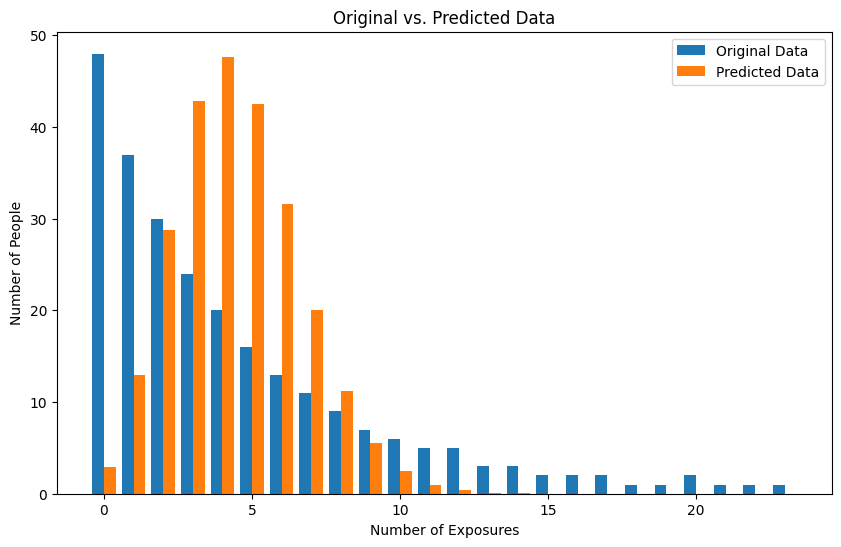

In [ ]:
# Graphing the original and predicted number of exposures

# Define bar width and x-axis positions
bar_width = 0.4
x = billboard['EXPOSURES']  # Original x positions

plt.figure(figsize=(10, 6))

# Plot original data bars with a left offset
plt.bar(x - bar_width / 2, billboard['PEOPLE'], width=bar_width, label='Original Data')

# Plot predicted data bars with a right offset
plt.bar(x + bar_width / 2, predicted_val_1, width=bar_width, label='Predicted Data')

# Labels and title
plt.xlabel('Number of Exposures')
plt.ylabel('Number of People')
plt.title('Original vs. Predicted Data')
plt.legend()
plt.show()

## Question 2: The NBD Model

In [ ]:
# Defining a log-likelihood function for the NBD
def nbd_log_likelihood(params, data):
    shape , scale = params[0], params[1]
    exposures = data['EXPOSURES']
    people = data['PEOPLE']
    # use log-probability mass function for NBD
    return -np.sum(nbinom.logpmf(exposures, shape, scale) * people)

In [ ]:
# Estimate using MLE

# initial guesses for paramters
initial_params = [1, 0.5]

# Adding bounds to ensure parameters are within realistic ranges
bounds = [(1e-5, None), (1e-5, 1 - 1e-5)]  # shape > 0 and 0 < scale < 1

# Perform MLE to estimate parameters
result_2 = minimize(nbd_log_likelihood, initial_params, args=(billboard), bounds=bounds)
shape_2, scale_2 = result_2.x
max_ll_2 = -result_2.fun

# Displaying results
print('Estimated shape:', shape_2)
print('Estimated scale:', scale_2)
print('Maximum log-likelihood:', max_ll_2)

Estimated shape: 0.969259234509637
Estimated scale: 0.17865674852777988
Maximum log-likelihood: -649.6888274836624


In [ ]:
# comparing log-likelihoods of Poisson and NBD models
print('Poisson Model Log-Likelihood:', max_ll_1)
print('NBD Model Log-Likelihood:', max_ll_2)
lrt2 = 2 * (max_ll_2 - max_ll_1)
print('Likelihood Ratio Test Statistic:', lrt2)

Poisson Model Log-Likelihood: -929.0438827272951
NBD Model Log-Likelihood: -649.6888274836624
Likelihood Ratio Test Statistic: 558.7101104872654


Since the log-likelihood of the NBD model is higher than the Poisson model, the NBD model is better.

In [ ]:
# Predicting number of people for each exposure level using the derived NBD model
predicted_val_2 = nbinom.pmf(np.arange(24), shape_2, scale_2) * billboard['PEOPLE'].sum()
print(predicted_val_2)

[47.09262832 37.49018387 30.31901993 24.64715026 20.08819328 16.39786175
 13.39926892 10.95706847  8.96493275  7.33813667  6.00860118  4.92133226
  4.03174826  3.30361873  2.70744694  2.21918596  1.81921144  1.49149511
  1.22293732  1.00282617  0.82239851  0.67448268  0.55320771  0.45376613]


In [ ]:
# Showing how predicted values are obtained using case of 2 exposures

# calculating probability of 2 exposures
prob_2_exposures = nbinom.pmf(2, shape_2, scale_2)
print('Probability of 2 Exposures:', prob_2_exposures)

# printing total number of people
print('Total Number of People:', billboard['PEOPLE'].sum())

# multiplying the probability by the total number of people in dataset
predicted_2_exposures_2 = prob_2_exposures * billboard['PEOPLE'].sum()
print('Predicted Number of People w/ 2 Exposures:', predicted_2_exposures_2)

Probability of 2 Exposures: 0.12127607973047129
Total Number of People: 250
Predicted Number of People w/ 2 Exposures: 30.319019932617824


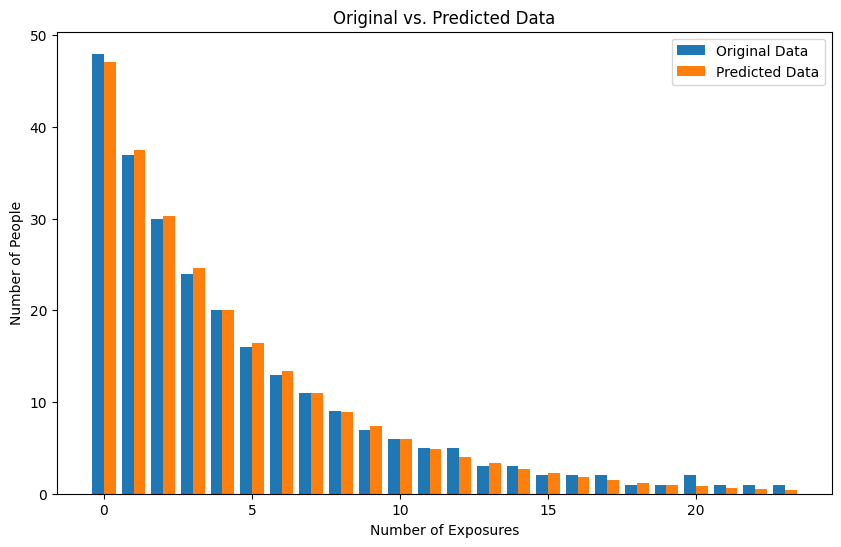

In [ ]:
# Graphing the original and predicted number of exposures

# Define bar width and x-axis positions
bar_width = 0.4
x = billboard['EXPOSURES']  # Original x positions

plt.figure(figsize=(10, 6))

# Plot original data bars with a left offset
plt.bar(x - bar_width / 2, billboard['PEOPLE'], width=bar_width, label='Original Data')

# Plot predicted data bars with a right offset
plt.bar(x + bar_width / 2, predicted_val_2, width=bar_width, label='Predicted Data')

# Labels and title
plt.xlabel('Number of Exposures')
plt.ylabel('Number of People')
plt.title('Original vs. Predicted Data')
plt.legend()
plt.show()

We can also see visually, that the NBD model is significantly more similar to the original data than the Poisson model.

## Question 3: The Poisson Regression

In [ ]:
khakichinos = pd.read_csv('khakichinos.csv')

In [ ]:
khakichinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728 entries, 0 to 2727
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2728 non-null   int64  
 1   NumberofVisits  2728 non-null   int64  
 2   LnInc           2728 non-null   float64
 3   Sex             2728 non-null   int64  
 4   LnAge           2728 non-null   float64
 5   HHSize          2728 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 128.0 KB


In [ ]:
khakichinos.head()

,ID,NumberofVisits,LnInc,Sex,LnAge,HHSize
0,1,0,11.379394,1,3.871201,2
1,2,5,9.769956,1,4.043051,1
2,3,0,11.082143,0,3.332205,2
3,4,0,10.915088,1,3.951244,3
4,5,0,10.915088,1,2.833213,3


In [ ]:
kc_number_of_visits_counts = khakichinos['NumberofVisits'].value_counts().sort_index()
kc_number_of_visits_counts.head()

,count
NumberofVisits,
0,2046
1,318
2,129
3,66
4,38


In [ ]:
# Defining function for Poisson Regression

def poisson_regression_log_likelihood(params, data):
    # Creating coefficients
    lambda0, beta1, beta2, beta3, beta4 = params
    # Predicting lambda-i
    pred_lmbda_i = (lambda0 * np.exp(
                    beta1 * data['LnInc'] +
                    beta2 * data['Sex'] +
                    beta3 * data['LnAge'] +
                    beta4 * data['HHSize']))
    # calculate log-likelihood
    return -np.sum(poisson.logpmf(data['NumberofVisits'], pred_lmbda_i))

In [ ]:
# Estimating parameters using MLE

# initial guesses for parameters
initial_params = [.01, .01, .01, .01, .01]

# Perform MLE to estimate parameters
result_3 = minimize(poisson_regression_log_likelihood, initial_params, args=(khakichinos))
beta_estimates_3 = result_3.x
max_ll_3 = -result_3.fun

# Displaying results
print('Estimated lambda0:', beta_estimates_3[0])
print('Estimated beta1:', beta_estimates_3[1])
print('Estimated beta2:', beta_estimates_3[2])
print('Estimated beta3:', beta_estimates_3[3])
print('Estimated beta4:', beta_estimates_3[4])
print('Maximum log-likelihood:', max_ll_3)


Estimated lambda0: 0.04388061722843814
Estimated beta1: 0.09383029176189996
Estimated beta2: 0.004260784294525481
Estimated beta3: 0.5882536417151091
Estimated beta4: -0.03590703678325204
Maximum log-likelihood: -6291.496746510639


In [ ]:
# Predicting number of visits to the site


# Define the range of possible visit counts (0 to 23)
visit_counts = np.arange(24)

# Initialize an array to store the expected count for each visit level
predicted_val_3 = np.zeros(24)

# Extracting lambda0 and coeffecients
lambda0 = beta_estimates_3[0]
beta1 = beta_estimates_3[1]
beta2 = beta_estimates_3[2]
beta3 = beta_estimates_3[3]
beta4 = beta_estimates_3[4]

lambda_i = lambda0 * np.exp(
    beta1 * khakichinos['LnInc'] +
    beta2 * khakichinos['Sex'] +
    beta3 * khakichinos['LnAge'] +
    beta4 * khakichinos['HHSize']
)

# Loop over each visit count k (0 to 23)
for k in visit_counts:
    # Calculate the probability of k visits for each individual using PredictedLambda_Poisson
    predicted_val_3[k] = poisson.pmf(k, lambda_i).sum()

# Multiply by total count if needed, or print directly
print(predicted_val_3)

[1087.05655515  968.08149215  463.32877235  156.64117638   41.61373301
    9.18920269    1.74611165    0.29229942    0.04384585    0.00596983
    0.00074526    0.000086      0.00000924    0.00000093    0.00000009
    0.00000001    0.            0.            0.            0.
    0.            0.            0.            0.        ]


In [ ]:
# Showing how predicted values are obtained using case of 2 visits

# probability of exactly 2 visits for each individual and sum
expected_count_2_visits = poisson.pmf(2, lambda_i).sum()
print('Expected count of people with exactly 2 visits:', expected_count_2_visits)

Expected count of people with exactly 2 visits: 463.3287723522079


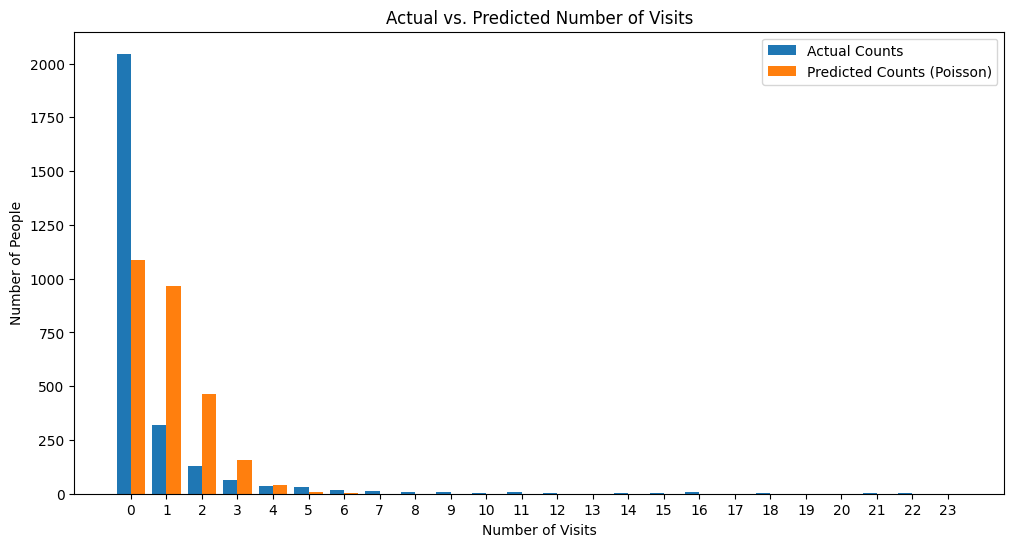

In [ ]:
# Graphing the original and predicted number of exposures

# Define the range of possible visit counts (0 to 23)
visit_counts = np.arange(24)

# Calculate the actual counts for each visit level
actual_counts = khakichinos['NumberofVisits'].value_counts().reindex(visit_counts, fill_value=0)

# Calculate the predicted counts for each visit level
predicted_counts = []
for k in visit_counts:
    # Sum the probabilities across all individuals to get the expected count for k visits
    expected_count_k = poisson.pmf(k, lambda_i).sum()
    predicted_counts.append(expected_count_k)

# Convert predicted_counts to a numpy array for easier handling
predicted_counts = np.array(predicted_counts)

# Plotting the actual vs. predicted counts
bar_width = 0.4
x = np.arange(len(visit_counts))

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width / 2, actual_counts, width=bar_width, label='Actual Counts')
plt.bar(x + bar_width / 2, predicted_counts, width=bar_width, label='Predicted Counts (Poisson)')
plt.xlabel('Number of Visits')
plt.ylabel('Number of People')
plt.title('Actual vs. Predicted Number of Visits')
plt.xticks(x, visit_counts)  # Set x-ticks to show visit numbers (0 to 23)
plt.legend()
plt.show()

## Question 4: NBD Regression

In [ ]:
# creating a new copy of dataset
khakichinos_NBD = pd.read_csv('khakichinos.csv')

In [ ]:
# Defining a function for NBD Regression

def nbd_regression_log_likelihood(params, data):
    # Creating coefficients
    shape, scale, beta1, beta2, beta3, beta4 = params
    # calculating exp of betas
    exp_betas = np.exp(
        beta1 * data['LnInc'] +
        beta2 * data['Sex'] +
        beta3 * data['LnAge'] +
        beta4 * data['HHSize'])
    # calculating separate parts of NBD prob equation
    nbd_part1 = gamma(shape + data['NumberofVisits']) / (gamma(shape) * factorial(data['NumberofVisits' ]))
    nbd_part2 = (scale / (scale + exp_betas)) ** shape
    nbd_part3 = (exp_betas / (scale + exp_betas)) ** data['NumberofVisits']
    # calculate log-likelihood
    return -np.sum(np.log(nbd_part1 * nbd_part2 * nbd_part3))


In [ ]:
# Estimating parameters using MLE

inital_params = [.01, 0.01, .01, .01, .01, .01]

# creating constraints for shape and scale
bounds = [(1e-6, None), (1e-6, None), (None, None), (None, None), (None, None), (None, None)]

# Perform MLE to estimate parameters
result_4 = minimize(nbd_regression_log_likelihood, inital_params, args=(khakichinos_NBD), bounds=bounds)
estimated_params = result_4.x
max_ll_4 = -result_4.fun

print('Estimated shape:', estimated_params[0])
print('Estimated scale:', estimated_params[1])
print('Estimated beta1:', estimated_params[2])
print('Estimated beta2:', estimated_params[3])
print('Estimated beta3:', estimated_params[4])
print('Estimated beta4:', estimated_params[5])
print('Maximum log-likelihood:', max_ll_4)

Estimated shape: 0.13874843448038793
Estimated scale: 8.1959516088979
Estimated beta1: 0.07337328467611891
Estimated beta2: -0.009378459322754764
Estimated beta3: 0.902201345694857
Estimated beta4: -0.024293119873649304
Maximum log-likelihood: -2888.966114329397


In [ ]:
# Predicting number of visits to the site

# Defining range of possible visit counts (0 to 23)
visit_counts = np.arange(24)

# Initialize an array to store the expected count for each visit level
predicted_val_4 = np.zeros(24)

# Extracting parameters and coefficients
shape = estimated_params[0]  # Dispersion parameter
scale = estimated_params[1]  # Intercept
beta1 = estimated_params[2]  # Coefficient for LnInc
beta2 = estimated_params[3]  # Coefficient for Sex
beta3 = estimated_params[4]  # Coefficient for LnAge
beta4 = estimated_params[5]  # Coefficient for HHSize

lambda_i = np.exp(
    scale +
    beta1 * khakichinos_NBD['LnInc'] +
    beta2 * khakichinos_NBD['Sex'] +
    beta3 * khakichinos_NBD['LnAge'] +
    beta4 * khakichinos_NBD['HHSize']
)

# Loop over each visit count k (0 to 23)
for k in visit_counts:
    # Calculate the probability of k visits for each individual
    nbd_part1 = gamma(shape + k) / (gamma(shape) * factorial(k))
    nbd_part2 = (scale / (scale + lambda_i)) ** shape
    nbd_part3 = (lambda_i / (scale + lambda_i)) ** k
    p = nbd_part1*nbd_part2*nbd_part3
    # Calculate probability for k visits by each individual and sum
    predicted_val_4[k] = nbinom.pmf(k, shape, p).sum()

# Multiply by total count if needed, or print directly
print(predicted_val_4)

[2247.46140448  228.92985405  120.00027781   81.41209998   61.65311615
   49.63820765   41.55736955   35.74845002   31.37040337   27.95190232
   25.20825096   22.95730561   21.07709964   19.48287963   18.11391363
   16.92554076   15.88418302   14.96410692   14.14525815   13.41177611
   12.75095173   12.15248138   11.60792322   11.1102947 ]


In [ ]:
# Calculate expected count for exactly 2 visits
k = 2
nbd_part1 = gamma(shape + k) / (gamma(shape) * factorial(k))
nbd_part2 = (scale / (scale + lambda_i)) ** shape
nbd_part3 = (lambda_i / (scale + lambda_i)) ** k
p_k_2 = nbd_part1 * nbd_part2 * nbd_part3

# Sum the probabilities across all individuals to get expected count for k = 2
nbd_expected_count_2_visits = nbinom.pmf(2, shape, p_k_2).sum()

print('Expected count of people with exactly 2 visits:', nbd_expected_count_2_visits)

Expected count of people with exactly 2 visits: 120.00027780623357


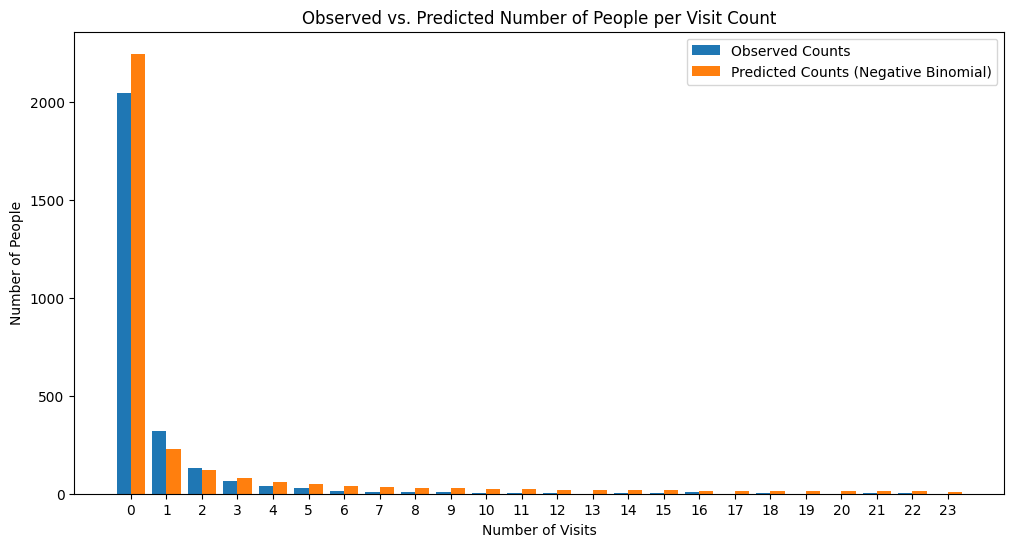

In [ ]:
# Graphing predicited vs observed  number of visits
visits_counts = np.arange(24)

# Calculate the actual counts for each visit level
observed_counts = khakichinos_NBD['NumberofVisits'].value_counts().reindex(visit_counts, fill_value=0)

# Set up the bar width and positions
bar_width = 0.4
x = np.arange(len(visit_counts))

# Plotting the actual vs. predicted counts
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width / 2, observed_counts, width=bar_width, label='Observed Counts')
plt.bar(x + bar_width / 2, predicted_val_4, width=bar_width, label='Predicted Counts (Negative Binomial)')
plt.xlabel('Number of Visits')
plt.ylabel('Number of People')
plt.title('Observed vs. Predicted Number of People per Visit Count')
plt.xticks(x, visit_counts)  # Set x-ticks to show visit numbers (0 to 23)
plt.legend()
plt.show()

# Part II: Analysis of New Data

## Question 1:

In [ ]:
books = pd.read_csv('books.csv')
books.head()

,userid,education,region,hhsz,age,income,child,race,country,domain,date,product,qty,price
0,11443031,4.0,1.0,2,11.0,4,1,1,0,amazon.com,20070101,LEONARD WOOLF A BIOGRAPHY BOOKS VICTORIA GLEND...,1,19.80
1,11443031,4.0,1.0,2,11.0,4,1,1,0,amazon.com,20070101,THE VIEW FROM CASTLE ROCK STORIES BOOKS ALICE ...,1,17.13
2,11443031,4.0,1.0,2,11.0,4,1,1,0,amazon.com,20070101,WILLIAM JAMES IN THE MAELSTROM OF AMERICAN MOD...,1,19.80
3,11519009,NaN,2.0,3,5.0,3,1,2,0,amazon.com,20070101,DRIVEN,1,2.00
4,11519009,NaN,2.0,3,5.0,3,1,2,0,amazon.com,20070101,CHOCOLATE COVERED FORBIDDEN FRUIT,1,3.88


In [ ]:
barnsnobl = books.loc[books['domain']== 'barnesandnoble.com']
barnsnobl.head()

,userid,education,region,hhsz,age,income,child,race,country,domain,date,product,qty,price
19,13503636,4.0,3.0,4,8.0,7,1,1,1,barnesandnoble.com,20070101,TAO TE CHING: A NEW ENGLISH VERSION PAPERBACK,1,8.95
20,13503636,4.0,3.0,4,8.0,7,1,1,1,barnesandnoble.com,20070101,THE COSMO KAMA SUTRA: 77 MIND-BLOWING SEX POSI...,1,12.56
21,13503636,4.0,3.0,4,8.0,7,1,1,1,barnesandnoble.com,20070101,THE COLLECTED POEMS OF EMILY DICKINSON (BARNES...,1,5.95
45,14559596,NaN,4.0,2,10.0,5,1,1,0,barnesandnoble.com,20070101,"SOUPS, SALADS AND STARTERS HARDCOVER",1,7.18
46,14559596,NaN,4.0,2,10.0,5,1,1,0,barnesandnoble.com,20070101,WILLIAMS-SONOMA BAKING HARDCOVER,1,7.18


### Creating books01 for part a:

In [ ]:
# Step 1: Count the number of purchases for each user (each appearance of 'userid' represents one purchase)
purchases_per_user = barnsnobl.groupby('userid').size().reset_index(name='PURCHASES')

# Step 2: Count how many people made each number of purchases
books01 = purchases_per_user.groupby('PURCHASES').size().reset_index(name='PEOPLE')

# Display the resulting dataset
print("First 10 Records:\n", books01.head(10))
print("\nLast 10 Records:\n", books01.tail(10))


First 10 Records:
    PURCHASES  PEOPLE
0          1     790
1          2     354
2          3     174
3          4     121
4          5      81
5          6      68
6          7      30
7          8      46
8          9      29
9         10      18

Last 10 Records:
     PURCHASES  PEOPLE
37         43       2
38         44       1
39         45       1
40         46       1
41         50       1
42         56       1
43         58       1
44         63       1
45         86       1
46        111       1


### Creating books02 for part b:

In [ ]:
books02 = pd.read_csv('books.csv')
books02.head()

,userid,education,region,hhsz,age,income,child,race,country,domain,date,product,qty,price
0,11443031,4.0,1.0,2,11.0,4,1,1,0,amazon.com,20070101,LEONARD WOOLF A BIOGRAPHY BOOKS VICTORIA GLEND...,1,19.80
1,11443031,4.0,1.0,2,11.0,4,1,1,0,amazon.com,20070101,THE VIEW FROM CASTLE ROCK STORIES BOOKS ALICE ...,1,17.13
2,11443031,4.0,1.0,2,11.0,4,1,1,0,amazon.com,20070101,WILLIAM JAMES IN THE MAELSTROM OF AMERICAN MOD...,1,19.80
3,11519009,NaN,2.0,3,5.0,3,1,2,0,amazon.com,20070101,DRIVEN,1,2.00
4,11519009,NaN,2.0,3,5.0,3,1,2,0,amazon.com,20070101,CHOCOLATE COVERED FORBIDDEN FRUIT,1,3.88


In [ ]:
# Filter records with 'barnesandnoble.com' in the 'domain' column
barnes_and_noble_books = books02[books02['domain'] == 'barnesandnoble.com']

# Count the number of purchases from 'barnesandnoble.com' per user (userid)
barnes_purchase_counts = barnes_and_noble_books.groupby('userid').size().reset_index(name='barnesandnoble_purchase_count')

# Merge the purchase count with the original books dataframe on 'userid'
books_with_barnes_count = pd.merge(books02, barnes_purchase_counts, on='userid', how='left')

# Drop unnecessary columns
books_with_barnes_count = books_with_barnes_count.drop(columns=['date', 'product', 'price'])

# Keep only one record per 'userid' with demographic info and the purchase count
books_with_barnes_count_unique = books_with_barnes_count.drop_duplicates(subset=['userid'])


books02 = books_with_barnes_count_unique
# Display the final dataset
print("First 10 Records:\n", books02.head(10))
print("\nLast 10 Records:\n", books02.tail(10))

First 10 Records:
       userid  education  region  hhsz   age  income  child  race  country  \
0   11443031        4.0     1.0     2  11.0       4      1     1        0   
3   11519009        NaN     2.0     3   5.0       3      1     2        0   
9   11550824        NaN     4.0     3   6.0       7      1     1        1   
10  12650861        4.0     1.0     5   7.0       6      1     1        0   
12  12856796        NaN     2.0     1   6.0       1      0     1        0   
15  12879242        NaN     NaN     5   7.0       2      0     1        0   
16  12941587        4.0     4.0     4   8.0       6      1     1        0   
18  13068697        2.0     4.0     1   7.0       2      0     1        0   
19  13503636        4.0     3.0     4   8.0       7      1     1        1   
22  13586673        NaN     1.0     4  10.0       6      1     1        0   

                domain  qty  barnesandnoble_purchase_count  
0           amazon.com    1                            NaN  
3          

In [ ]:
books02.head(10)

,userid,education,region,hhsz,age,income,child,race,country,domain,qty,barnesandnoble_purchase_count
0,11443031,4.0,1.0,2,11.0,4,1,1,0,amazon.com,1,NaN
3,11519009,NaN,2.0,3,5.0,3,1,2,0,amazon.com,1,NaN
9,11550824,NaN,4.0,3,6.0,7,1,1,1,amazon.com,1,NaN
10,12650861,4.0,1.0,5,7.0,6,1,1,0,amazon.com,1,8.0
12,12856796,NaN,2.0,1,6.0,1,0,1,0,amazon.com,1,NaN
15,12879242,NaN,NaN,5,7.0,2,0,1,0,amazon.com,1,NaN
16,12941587,4.0,4.0,4,8.0,6,1,1,0,amazon.com,1,NaN
18,13068697,2.0,4.0,1,7.0,2,0,1,0,amazon.com,1,NaN
19,13503636,4.0,3.0,4,8.0,7,1,1,1,barnesandnoble.com,1,4.0
22,13586673,NaN,1.0,4,10.0,6,1,1,0,amazon.com,1,NaN


## Question 2: Poisson (Books01)

In [ ]:
# Defining a log-likelihood function for the Poisson Distribution
def poisson_log_likelihood(lmda, data):
    purchases = data['PURCHASES']
    people = data['PEOPLE']
    # use log-probability mass function for Poisson
    return -np.sum(poisson.logpmf(purchases, lmda) * people)

In [ ]:
# Estimating lambda using MLE
initial_lmda = books01['PURCHASES'].mean()

# Defining bounds for lambda
bounds = [(1e-6, None)]

result_1 = minimize(poisson_log_likelihood, initial_lmda, args=(books01), bounds=bounds)
lmda_1 = result_1.x
max_ll_1 = -result_1.fun

# Displaying results
print('Estimated lambda:', lmda_1)
print('Maximum log-likelihood:', max_ll_1)

Estimated lambda: [3.67384122]
Maximum log-likelihood: -6777.838935426649


In [ ]:
# Prediciting value based on Poisson model derived above
np.set_printoptions(suppress=True)

predicted_val_1 = poisson.pmf(books01['PURCHASES'], lmda_1) * books01['PEOPLE'].sum()
print(predicted_val_1)

[168.94665891 310.3415995  380.04858654 349.05954044 256.47786538
 157.04315885  82.42166141  37.85051211  15.45075239   5.6763611
   1.89582267   0.58041262   0.16402645   0.04304337   0.0105423
   0.00242067   0.00052313   0.00010677   0.00002065   0.00000379
   0.00000066   0.00000011   0.00000002   0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.        ]


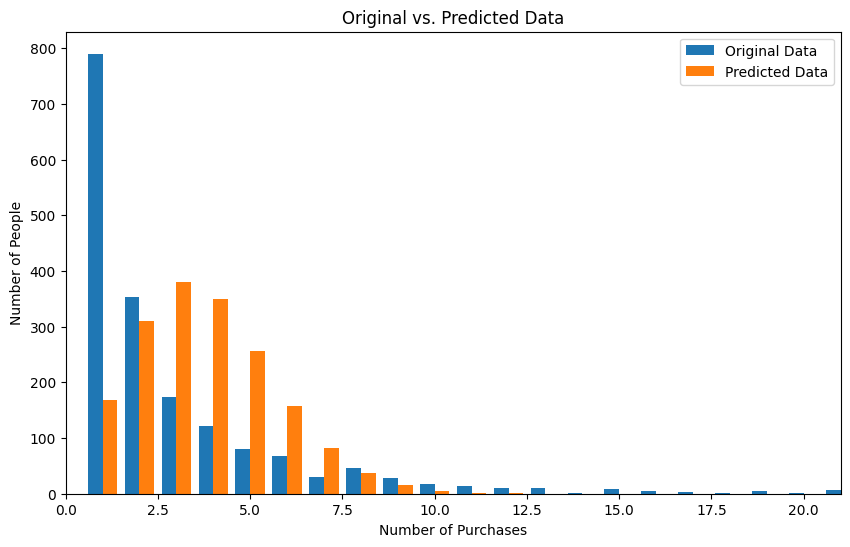

In [ ]:
# Graphing predicted versus actual

# Define bar width and x-axis positions
bar_width = 0.4
x = books01['PURCHASES']

plt.figure(figsize=(10, 6))

# Plot original data bars with a left offset
plt.bar(x - bar_width / 2, books01['PEOPLE'], width=bar_width, label='Original Data')

# Plot predicted data bars with a right offset
plt.bar(x + bar_width / 2, predicted_val_1, width=bar_width, label='Predicted Data')

# Labels and title
plt.xlabel('Number of Purchases')
plt.xlim(0,21)
plt.ylabel('Number of People')
plt.title('Original vs. Predicted Data')
plt.legend()
plt.show();

## Question 3: Poisson (Books02)

In [ ]:
books_q3 = books02[['barnesandnoble_purchase_count']].dropna()

# Mean purchase count as the lambda parameter for the Poisson distribution
lambda_estimate = books_q3['barnesandnoble_purchase_count'].mean()

# Calculate log-likelihood for Poisson
observed_counts = books_q3['barnesandnoble_purchase_count']
log_likelihood = np.sum(poisson.logpmf(observed_counts, mu=lambda_estimate))

# Print lambda and log-likelihood
print("Lambda (Rate Parameter):", lambda_estimate)
print("Log-Likelihood:", log_likelihood)


Lambda (Rate Parameter): 3.673841059602649
Log-Likelihood: -6777.838935426644


In [ ]:
# Calculate observed_counts with purchases greater than 20 aggregated
observed_counts = np.bincount(books_q3['barnesandnoble_purchase_count'], minlength=21)
observed_counts = np.append(observed_counts[:21], observed_counts[21:].sum())  # Aggregate >20 into a single bin

# Define the range for purchases
purchase_range = list(range(21))

# Predict the number of people with 0 to 20+ purchases
predicted_counts = [len(books_q3) * poisson.pmf(k, mu=lambda_estimate) for k in purchase_range]
predicted_counts.append(len(books_q3) * poisson.sf(20, mu=lambda_estimate))  # Aggregate 20+ into a single bin


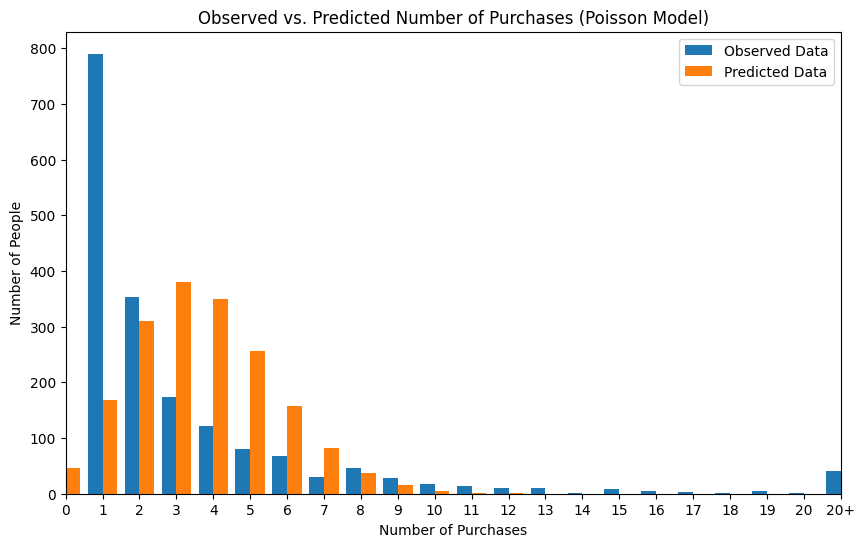

In [ ]:
# Graphing predicted versus actual

# Define bar width and x-axis positions
bar_width = 0.4
x = np.arange(22)  # Define x-axis positions from 0 to 21 (including 20+)

plt.figure(figsize=(10, 6))

# Plot observed data bars with a left offset
plt.bar(x - bar_width / 2, observed_counts, width=bar_width, label='Observed Data')

# Plot predicted data bars with a right offset
plt.bar(x + bar_width / 2, predicted_counts, width=bar_width, label='Predicted Data')

# Labels and title
plt.xlabel('Number of Purchases')
plt.xticks(ticks=range(22), labels=list(range(21)) + ['20+'])
plt.xlim(0, 21)
plt.ylabel('Number of People')
plt.title('Observed vs. Predicted Number of Purchases (Poisson Model)')
plt.legend()
plt.show()

## Question 4: NBD (Books01)

In [ ]:
def nbd_log_likelihood(params, data):
    shape , scale = params[0], params[1]
    purchases = data['PURCHASES']
    people = data['PEOPLE']
    # use log-probability mass function for NBD
    return -np.sum(nbinom.logpmf(purchases, shape, scale) * people)

Estimating parameters using MLE

In [ ]:
# initial guesses for paramters
initial_params = [1, 0.5]

# Adding bounds to ensure parameters are within realistic ranges
bounds = [(1e-5, None), (1e-5, 1 - 1e-5)]  # shape > 0 and 0 < scale < 1

# Perform MLE to estimate parameters
result_2 = minimize(nbd_log_likelihood, initial_params, args=(books01), bounds=bounds)
shape_2, scale_2 = result_2.x
max_ll_2 = -result_2.fun

# Displaying results
print('Estimated shape:', shape_2)
print('Estimated scale:', scale_2)
print('Maximum log-likelihood:', max_ll_2)

Estimated shape: 1.2651792415545031
Estimated scale: 0.2561596041291005
Maximum log-likelihood: -4379.261606805015


Showing how predicted values are obtained using case of 2 purchasees

In [ ]:
# calculating probability of 2 purchases
prob_2_purchases = nbinom.pmf(2, shape_2, scale_2)
print('Probability of 2 Purchases:', prob_2_purchases)

# printing total number of people
print('Total Number of People:', books01['PEOPLE'].sum())

# multiplying the probability by the total number of people in dataset
predicted_purchases_5 = prob_2_purchases * books01['PEOPLE'].sum()
print('Predicted Number of People w/ 2 Purchases:', predicted_purchases_5)

Probability of 2 Purchases: 0.14152856373338968
Total Number of People: 1812
Predicted Number of People w/ 2 Purchases: 256.4497574849021


## Question 5: NBD (Books02)


In [ ]:
# Clean the data by removing NaNs in 'barnesandnoble_purchase_count'
books02_5 = books_with_barnes_count_unique[['barnesandnoble_purchase_count']].dropna()

# Convert 'barnesandnoble_purchase_count' to integer after cleaning
books02_5['barnesandnoble_purchase_count'] = books02_5['barnesandnoble_purchase_count'].astype(int)

# Define the Negative Binomial Log-Likelihood Function
def nbd_log_likelihood(params, data):
    mu, alpha = params
    n = 1 / alpha  # Shape parameter
    p = n / (n + mu)  # Success probability
    log_likelihood = np.sum(nbinom.logpmf(data, n, p))
    return -log_likelihood  # Return negative for maximization

# Optimize to find the best parameters (mu and alpha)
initial_params = [books02_5['barnesandnoble_purchase_count'].mean(), 1.0]
result = minimize(
    nbd_log_likelihood,
    initial_params,
    args=(books02_5['barnesandnoble_purchase_count'].values,),
    bounds=[(0.0001, None), (0.0001, None)],
    tol=1e-10
)

# Extract the optimized parameters
mu_opt, alpha_opt = result.x
log_likelihood = -result.fun

# Calculate the optimized shape (n) and scale (p)
n_opt = 1 / alpha_opt
p_opt = n_opt / (n_opt + mu_opt)

# Print estimated parameters and log-likelihood
print("Estimated Shape:", n_opt)
print("Estimated Scale:", p_opt)
print("Log-Likelihood:", log_likelihood)

Estimated Shape: 1.265184119368754
Estimated Scale: 0.2561606949926746
Log-Likelihood: -4379.261606797416


In [ ]:
# Predictions for 0 to 20+ purchases
purchase_range = list(range(21))
predicted_counts = [len(books02_5) * nbinom.pmf(k, n_opt, p_opt) for k in purchase_range]
predicted_counts.append(len(books02_5) * nbinom.sf(20, n_opt, p_opt))  # Aggregate 20+ into a single bin

# Aggregate observed counts to match predicted counts (0 to 20, and 20+ bin)
observed_counts_aggregated = np.bincount(books02_5['barnesandnoble_purchase_count'], minlength=21)
observed_counts = np.append(observed_counts_aggregated[:21], observed_counts_aggregated[21:].sum())  # Aggregate >20 into a single bin

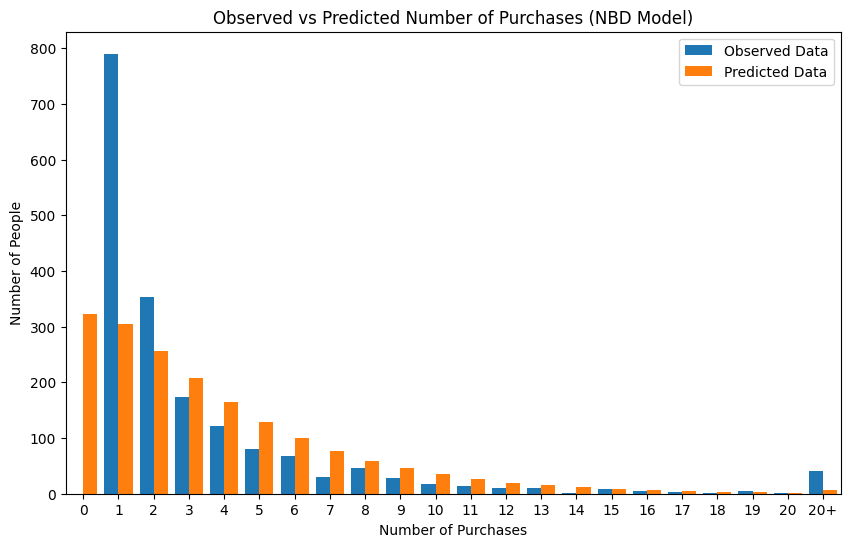

In [ ]:
# Define bar width and x-axis positions
bar_width = 0.4
x = np.arange(22)  # Define x-axis positions from 0 to 21 (including 20+)

plt.figure(figsize=(10, 6))

# Plot observed data bars with a left offset
plt.bar(x - bar_width / 2, observed_counts, width=bar_width, label='Observed Data')

# Plot predicted data bars with a right offset
plt.bar(x + bar_width / 2, predicted_counts, width=bar_width, label='Predicted Data')

# Labels and title
plt.xlabel('Number of Purchases')
plt.xticks(ticks=range(22), labels=list(range(21)) + ['20+'])
plt.xlim(-0.5, 21.5)
plt.ylabel('Number of People')
plt.title('Observed vs Predicted Number of Purchases (NBD Model)')
plt.legend()
plt.show()

In [ ]:
# showing prediction calculation for 2 purchases
pred_ex_2 = len(books02_5) * nbinom.pmf(2, n_opt, p_opt)
print('Predicted Number of people with 2 purchases:',pred_ex_2)

Predicted Number of people with 2 purchases: 256.45022427669835


## Question 6: Performance Calculations

In [ ]:
predicted_counts = np.array(predicted_counts)

# Total predicted number of people for each purchase count (from NBD predictions)
total_predicted_purchases = np.sum(predicted_counts)

# Reach: Sum of people with at least one purchase
reach = np.sum(predicted_counts[1:])  # Exclude 0-purchase count
reach_perc = reach / len(books02_5) * 100

# Average Frequency: Average number of purchases divided by reach
average_frequency = predicted_counts.mean() / reach

# Gross Ratings Points (GRPs): Total count of exposures
grps = reach_perc * average_frequency

print("Reach:", reach)
print("Reach Percentage:", reach_perc)
print("Average Frequency:", average_frequency)
print("Gross Ratings Points (GRPs):", grps)


Reach: 1488.542226704891
Reach Percentage: 82.14912950909994
Average Frequency: 0.05533174328951385
Gross Ratings Points (GRPs): 4.545454545454545


## Question 7: Cleaning Dataset

In [ ]:
books02.head()

,userid,education,region,hhsz,age,income,child,race,country,domain,qty,barnesandnoble_purchase_count
0,11443031,4.0,1.0,2,11.0,4,1,1,0,amazon.com,1,NaN
3,11519009,NaN,2.0,3,5.0,3,1,2,0,amazon.com,1,NaN
9,11550824,NaN,4.0,3,6.0,7,1,1,1,amazon.com,1,NaN
10,12650861,4.0,1.0,5,7.0,6,1,1,0,amazon.com,1,8.0
12,12856796,NaN,2.0,1,6.0,1,0,1,0,amazon.com,1,NaN


In [ ]:
# Step 1: Identify missing values and count them for each independent variable
missing_data_books01 = books01.isnull().sum()
missing_data_books02 = books02.isnull().sum()

# Display missing data information
print("Missing Values in books01 Dataset:")
print(missing_data_books01)

print("\nMissing Values in books02 Dataset:")
print(missing_data_books02)

# Step 2: Define thresholds for "many" and "small"
threshold_many = 0.30  # 30% of the rows
threshold_small = 0.05  # 5% of the rows

# Step 3: Drop variables with many missing values (more than 30%)
books01_cleaned = books01.dropna(axis=1, thresh=len(books01) * (1 - threshold_many))
columns_to_drop = [col for col in books02.columns if books02[col].isnull().mean() > threshold_many and col != 'barnesandnoble_purchase_count']
books02_cleaned = books02.drop(columns=columns_to_drop)

# Step 4: Drop rows with small missing values (less than 5%)
books01_cleaned = books01_cleaned.dropna(thresh=len(books01_cleaned.columns) * (1 - threshold_small))
books02_cleaned = books02_cleaned.dropna(thresh=len(books02_cleaned.columns) * (1 - threshold_small))

# Step 5: Replace remaining missing values with the mean of the column
# Replace missing values in remaining variables with column means
books01_cleaned = books01_cleaned.fillna(books01_cleaned.mean())

# defining numeric columns
numeric_cols = books02_cleaned.select_dtypes(include=['number']).columns
books02_cleaned[numeric_cols := books02_cleaned.select_dtypes(include=['float64', 'int64']).columns] = books02_cleaned[numeric_cols].fillna(books02_cleaned[numeric_cols].mean())

# Report the number of missing values after cleaning
print("\nMissing values in books01 after cleaning:")
print(books01_cleaned.isnull().sum())

print("\nMissing values in books02 after cleaning:")
print(books02_cleaned.isnull().sum())

Missing Values in books01 Dataset:
PURCHASES    0
PEOPLE       0
dtype: int64

Missing Values in books02 Dataset:
userid                              0
education                        6914
region                             11
hhsz                                0
age                                 1
income                              0
child                               0
race                                0
country                             0
domain                              0
qty                                 0
barnesandnoble_purchase_count    7639
dtype: int64

Missing values in books01 after cleaning:
PURCHASES    0
PEOPLE       0
dtype: int64

Missing values in books02 after cleaning:
userid                           0
region                           0
hhsz                             0
age                              0
income                           0
child                            0
race                             0
country                          0
domain  

In [ ]:
books02_cleaned.head()

,userid,region,hhsz,age,income,child,race,country,domain,qty,barnesandnoble_purchase_count
10,12650861,1.0,5,7.0,6,1,1,0,amazon.com,1,8.0
19,13503636,3.0,4,8.0,7,1,1,1,barnesandnoble.com,1,4.0
45,14559596,4.0,2,10.0,5,1,1,0,barnesandnoble.com,1,13.0
49,14594414,3.0,3,8.0,7,1,1,0,barnesandnoble.com,1,1.0
50,14621501,1.0,2,6.0,3,0,1,0,barnesandnoble.com,1,4.0


## Question 8: Poisson Regression

In [ ]:
books02_cleaned.head()

,userid,region,hhsz,age,income,child,race,country,domain,qty,barnesandnoble_purchase_count
10,12650861,1.0,5,7.0,6,1,1,0,amazon.com,1,8.0
19,13503636,3.0,4,8.0,7,1,1,1,barnesandnoble.com,1,4.0
45,14559596,4.0,2,10.0,5,1,1,0,barnesandnoble.com,1,13.0
49,14594414,3.0,3,8.0,7,1,1,0,barnesandnoble.com,1,1.0
50,14621501,1.0,2,6.0,3,0,1,0,barnesandnoble.com,1,4.0


In [ ]:
# Define Poisson Log-Likelihood Function
def poisson_log_likelihood(params, data):
    lambda0, beta_region, beta_hhsz, beta_age, beta_income, beta_child, beta_race, beta_country = params
    lambda_i = lambda0 * np.exp(
        + beta_region * data['region']
        + beta_hhsz * data['hhsz']
        + beta_age * data['age']
        + beta_income * data['income']
        + beta_child * data['child']
        + beta_race * data['race']
        + beta_country * data['country']
    )
    log_likelihood = np.sum(np.log(poisson.pmf(data['barnesandnoble_purchase_count'], lambda_i)))
    return -log_likelihood

In [ ]:
# Estimating parameters using MLE
initial_params = [1, 0, 0, 0, 0, 0, 0, 0]

result_8 = minimize(poisson_log_likelihood, initial_params, args=(books02_cleaned))
estimated_params = result_8.x
log_likelihood_8 = -result_8.fun

# Displaying results
print('Estimated lambda0:', estimated_params[0])
print('Estimated beta_region:', estimated_params[1])
print('Estimated beta_hhsz:', estimated_params[2])
print('Estimated beta_age:', estimated_params[3])
print('Estimated beta_income:', estimated_params[4])
print('Estimated beta_child:', estimated_params[5])
print('Estimated beta_race:', estimated_params[6])
print('Estimated beta_country:', estimated_params[7])
print('Log-likelihood:', log_likelihood)

Estimated lambda0: 3.4137766219871772
Estimated beta_region: 0.001324336431683898
Estimated beta_hhsz: 0.02137405243942264
Estimated beta_age: 0.01678054827709654
Estimated beta_income: 0.014352493438651
Estimated beta_child: -0.042417843637411655
Estimated beta_race: -0.1110136638543778
Estimated beta_country: -0.24100674861256036
Log-likelihood: -4379.261606797416


In [ ]:
# Predicting number of people with 0 to 20+ purchases
purchase_range = list(range(21))
predicted_counts_8 = [len(books02_cleaned) * poisson.pmf(k, mu=estimated_params[0]) for k in purchase_range]
predicted_counts_8.append(len(books02_cleaned) * poisson.sf(20, mu=lambda_i.mean())) # Aggregate 20+ into a single bin
print(predicted_counts_8)

[59.546222720787654, 203.27750305186657, 346.97199384719454, 394.82829369327715, 336.9638996772991, 230.06389663439933, 130.89779198229772, 63.83654601984406, 27.240463553869034, 10.332539739143549, 3.527298260724169, 1.0946734855669271, 0.3114142294781334, 0.08177681664204632, 0.01994055606236776, 0.004538173607675705, 0.0009682694355251593, 0.0001944385625165007, 3.6876101062867944e-05, 6.625619564129193e-06, 1.130919258710258e-06, 1809.0]


In [ ]:
# showing calculation of prediction using 2 purchases
pred_ex_8 = len(books02_cleaned) * poisson.pmf(2, mu=estimated_params[0])
print('Predicted Number of people with 2 purchases:',pred_ex_8)

Predicted Number of people with 2 purchases: 346.97199384719454


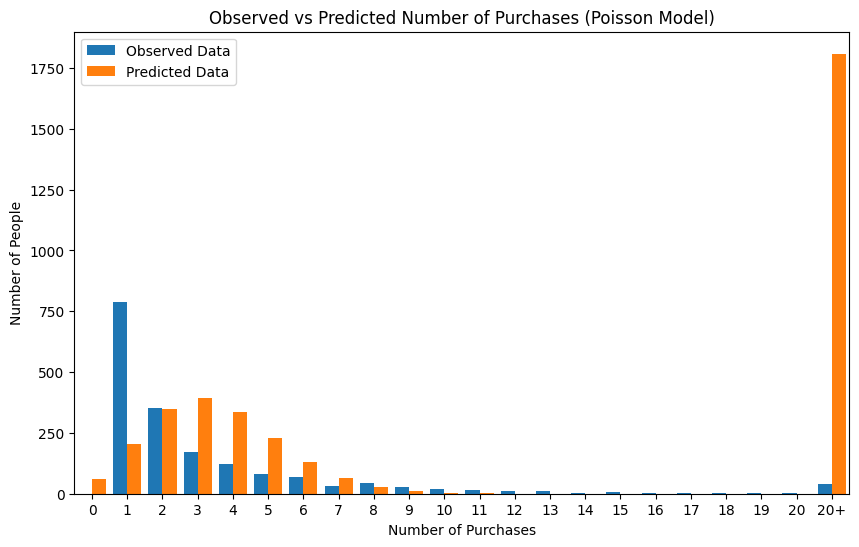

In [ ]:
# Graphing Observed vs Predicted

# Observed Counts
observed_counts_8 = np.bincount(books02_cleaned['barnesandnoble_purchase_count'], minlength=21)
observed_counts_8 = np.append(observed_counts_8[:21], observed_counts_8[21:].sum())  # Aggregate >20 into a single bin

# Defining bar width and x-axis positions
bar_width = 0.4
x = np.arange(22)  # Define x-axis positions from 0 to 21 (including 20+)

plt.figure(figsize=(10, 6))

# Plot observed data bars with a left offset
plt.bar(x - bar_width / 2, observed_counts_8, width=bar_width, label='Observed Data')

# Plot predicted data bars with a right offset
plt.bar(x + bar_width / 2, predicted_counts_8, width=bar_width, label='Predicted Data')

# Labels and Title
plt.xlabel('Number of Purchases')
plt.xticks(ticks=range(22), labels=list(range(21)) + ['20+'])
plt.xlim(-0.5, 21.5)
plt.ylabel('Number of People')
plt.title('Observed vs Predicted Number of Purchases (Poisson Model)')
plt.legend()
plt.show();

## Question 9: NBD Regression

In [ ]:
books02_cleaned.head()

,userid,region,hhsz,age,income,child,race,country,domain,qty,barnesandnoble_purchase_count
10,12650861,1.0,5,7.0,6,1,1,0,amazon.com,1,8.0
19,13503636,3.0,4,8.0,7,1,1,1,barnesandnoble.com,1,4.0
45,14559596,4.0,2,10.0,5,1,1,0,barnesandnoble.com,1,13.0
49,14594414,3.0,3,8.0,7,1,1,0,barnesandnoble.com,1,1.0
50,14621501,1.0,2,6.0,3,0,1,0,barnesandnoble.com,1,4.0


In [ ]:
books02_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1809 entries, 10 to 40916
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   userid                         1809 non-null   int64  
 1   region                         1809 non-null   float64
 2   hhsz                           1809 non-null   int64  
 3   age                            1809 non-null   float64
 4   income                         1809 non-null   int64  
 5   child                          1809 non-null   int64  
 6   race                           1809 non-null   int64  
 7   country                        1809 non-null   int64  
 8   domain                         1809 non-null   object 
 9   qty                            1809 non-null   int64  
 10  barnesandnoble_purchase_count  1809 non-null   float64
dtypes: float64(3), int64(7), object(1)
memory usage: 169.6+ KB


In [ ]:
# Defining a function for NBD regression

def nbd_log_likelihood(params, data):
    shape, scale, beta_region, beta_hhsz, beta_age, beta_income, beta_child, beta_race, beta_country = params
    exp_betas = np.exp(
        + beta_region * data['region']
        + beta_hhsz * data['hhsz']
        + beta_age * data['age']
        + beta_income * data['income']
        + beta_child * data['child']
        + beta_race * data['race']
        + beta_country * data['country']
    )
    # calculating separate parts of NBD prob equation
    nbd_part1 = gamma(shape + data['barnesandnoble_purchase_count']) / (gamma(shape) * factorial(data['barnesandnoble_purchase_count']))
    nbd_part2 = (scale / (scale + exp_betas)) ** shape
    nbd_part3 = (exp_betas / (scale + exp_betas)) ** data['barnesandnoble_purchase_count']
    # calculate log-likelihood
    return -np.sum(np.log(nbd_part1 * nbd_part2 * nbd_part3))

In [ ]:
# Estimating parameters using MLE
initial_params = [1, 0.5, 0, 0, 0, 0, 0, 0, 0]

bounds = [(1e-5, None), (1e-5, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)]

result_9 = minimize(nbd_log_likelihood, initial_params, args=(books02_cleaned), bounds=bounds)
estimated_params = result_9.x
log_likelihood_9 = -result_9.fun

# Displaying results
print('Estimated shape:', estimated_params[0])
print('Estimated scale:', estimated_params[1])
print('Estimated beta_region:', estimated_params[2])
print('Estimated beta_hhsz:', estimated_params[3])
print('Estimated beta_age:', estimated_params[4])
print('Estimated beta_income:', estimated_params[5])
print('Estimated beta_child:', estimated_params[6])
print('Estimated beta_race:', estimated_params[7])
print('Estimated beta_country:', estimated_params[8])
print('Log-likelihood:', log_likelihood_9)

Estimated shape: 1.2680108835678734
Estimated scale: 0.4450427915736833
Estimated beta_region: 0.0
Estimated beta_hhsz: 0.015000196308177968
Estimated beta_age: 0.018071786441500592
Estimated beta_income: 0.016492782124653372
Estimated beta_child: 0.0
Estimated beta_race: 0.0
Estimated beta_country: 0.0
Log-likelihood: -4370.209402631881


In [ ]:
# Predicting number of purchases

purchase_range = np.arange(22)
predicted_counts_9 = np.zeros(22)

# Extracting params
shape_9 = estimated_params[0]
scale_9 = estimated_params[1]
beta_region_9 = estimated_params[2]
beta_hhsz_9 = estimated_params[3]
beta_age_9 = estimated_params[4]
beta_income_9 = estimated_params[5]
beta_child_9 = estimated_params[6]
beta_race_9 = estimated_params[7]
beta_country_9 = estimated_params[8]

lambda_i = np.exp(
    scale_9 +
    beta_region_9 * books02_cleaned['region'] +
    beta_hhsz_9 * books02_cleaned['hhsz'] +
    beta_age_9 * books02_cleaned['age'] +
    beta_income_9 * books02_cleaned['income'] +
    beta_child_9 * books02_cleaned['child'] +
    beta_race_9 * books02_cleaned['race'] +
    beta_country_9 * books02_cleaned['country']
)

for k in purchase_range:
    nbd_part1 = gamma(shape_9 + k) / (gamma(shape_9) * factorial(k))
    nbd_part2 = (scale_9 / (scale_9 + lambda_i)) ** shape_9
    nbd_part3 = (lambda_i / (scale_9 + lambda_i)) ** k
    p = nbd_part1 * nbd_part2 * nbd_part3
    predicted_counts_9[k] = nbinom.pmf(k, shape, p).sum()

print(predicted_counts_9)

[1339.52808866  164.54614158   83.28124204   54.11152358   39.69221366
   31.37525812   26.09000509   22.48725117   19.89092052   17.93025596
   16.38817576   15.13122514   14.07430513   13.16164649   12.35594655
   11.63186523   10.97197459   10.36415476    9.79987799    9.27305763
    8.77926688    8.31520533]


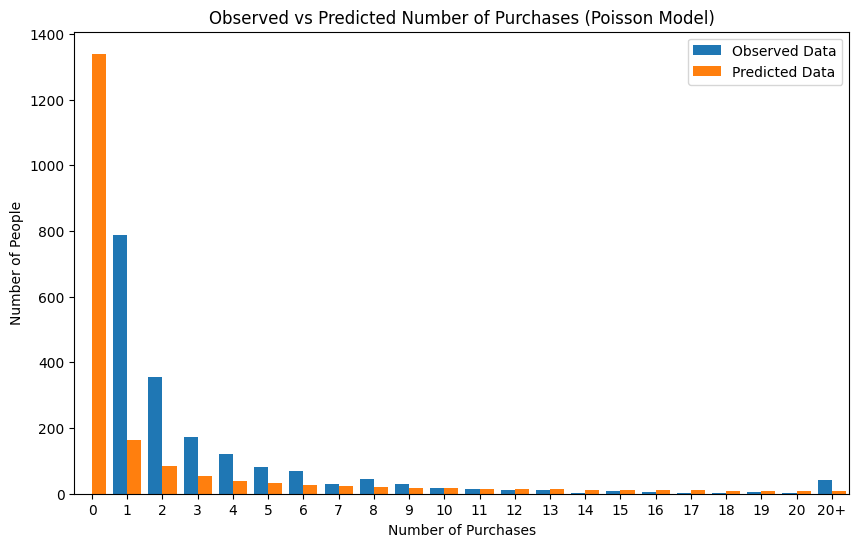

In [ ]:
# Graphing Predicted vs Observed

# Observed Counts
observed_counts_9 = np.bincount(books02_cleaned['barnesandnoble_purchase_count'], minlength=21)
observed_counts_9 = np.append(observed_counts_8[:21], observed_counts_9[21:].sum())  # Aggregate >20 into a single bin

# Defining bar width and x-axis positions
bar_width = 0.4
x = np.arange(22)  # Define x-axis positions from 0 to 21 (including 20+)

plt.figure(figsize=(10, 6))

# Plot observed data bars with a left offset
plt.bar(x - bar_width / 2, observed_counts_9, width=bar_width, label='Observed Data')

# Plot predicted data bars with a right offset
plt.bar(x + bar_width / 2, predicted_counts_9, width=bar_width, label='Predicted Data')

# Labels and Title
plt.xlabel('Number of Purchases')
plt.xticks(ticks=range(22), labels=list(range(21)) + ['20+'])
plt.xlim(-0.5, 21.5)
plt.ylabel('Number of People')
plt.title('Observed vs Predicted Number of Purchases (Poisson Model)')
plt.legend()
plt.show();

## Question 10:

### Poisson Model

In [ ]:
# AIC
AIC_Poisson = 2 * 1 - 2 * max_ll_1
print('Aic =', AIC_Poisson)
# BIC
BIC_Poisson = 1 * np.log(len(books01)) - 2 * max_ll_1
print('BIC =', BIC_Poisson)

Aic = 13557.677870853298
BIC = 13559.528018455008


### NBD Model

In [ ]:
# AIC
AIC_NBD = 2 * 2 - 2 * max_ll_2
print('Aic =', AIC_NBD)
# BIC
BIC_NBD = 2 * np.log(len(books02)) - 2 * max_ll_2
print('BIC =', BIC_NBD)

Aic = 8762.52321361003
BIC = 8776.83096528002


### Poisson Regression

In [ ]:
# AIC
AIC_Poisson_Regression = 2 * 8 - 2 * log_likelihood_8
print('Aic =', AIC_Poisson_Regression)
# BIC
BIC_Poisson_Regression = 8 * np.log(len(books02_cleaned)) - 2 * log_likelihood_8
print('BIC =', BIC_Poisson_Regression)

Aic = 13480.365565648875
BIC = 13524.369801532037


### NBD Regression

In [ ]:
# AIC
AIC_NBD_Regression = 2 * 9 - 2 * log_likelihood_9
print('Aic =', AIC_NBD_Regression)
# BIC
BIC_NBD_Regression = 9 * np.log(len(books02_cleaned)) - 2 * log_likelihood_9
print('BIC =', BIC_NBD_Regression)

Aic = 8758.418805263762
BIC = 8807.92357063232


Based on AIC, the NBD Regression is the best performing model.

Based on BIC, the NBD model is the best performing

### Log-Likelihood Ratio Test

In [ ]:
# Log-likelihood
print('Log-likelihood Poisson:', max_ll_1)
print('Log-likelihood NBD:', max_ll_2)
print('Log-likelihood Poisson Regression:', log_likelihood_8)
print('Log-likelihood NBD Regression:', log_likelihood_9)

Log-likelihood Poisson: -6777.838935426649
Log-likelihood NBD: -4379.261606805015
Log-likelihood Poisson Regression: -6732.182782824438
Log-likelihood NBD Regression: -4370.209402631881


In [ ]:
# log-likelihood NBD regression versus Poisson Regression
llr_1 = 2 * (log_likelihood_9 - log_likelihood_8)
print('Log-likelihood Ratio:', llr_1)

Log-likelihood Ratio: 4723.9467603851135


In [ ]:
# log-likelihood NBD model versus Poisson model
llr_2 = 2 * (max_ll_2 - max_ll_1)
print('Log-likelihood Ratio:', llr_2)

Log-likelihood Ratio: 4797.154657243269


In [ ]:
# log-likelihood NBD regression versus NBD model
llr_3 = 2 * (log_likelihood_9 - max_ll_2)
print('Log-likelihood Ratio:', llr_3)

Log-likelihood Ratio: 18.10440834626752
